In [297]:
#爬取大众点评12个地区top100热门餐厅的信息
#上海，北京，广州，深圳，天津，杭州，南京，苏州，成都，武汉，重庆，西安
import json
import random
import requests#HTTP请求库
__author__ = 'dell'
import os
import csv
# 城市列表
list_city = [["上海","fce2e3a36450422b7fad3f2b90370efd71862f838d1255ea693b953b1d49c7c0"],["北京","d5036cf54fcb57e9dceb9fefe3917fff71862f838d1255ea693b953b1d49c7c0"],["广州","e749e3e04032ee6b165fbea6fe2dafab71862f838d1255ea693b953b1d49c7c0"],["深圳","e049aa251858f43d095fc4c61d62a9ec71862f838d1255ea693b953b1d49c7c0"],["天津","2e5d0080237ff3c8f5b5d3f315c7c4a508e25c702ab1b810071e8e2c39502be1"],["杭州","91621282e559e9fc9c5b3e816cb1619c71862f838d1255ea693b953b1d49c7c0"],["南京","d6339a01dbd98141f8e684e1ad8af5c871862f838d1255ea693b953b1d49c7c0"],["苏州","536e0e568df850d1e6ba74b0cf72e19771862f838d1255ea693b953b1d49c7c0"],["成都","c950bc35ad04316c76e89bf2dc86bfe071862f838d1255ea693b953b1d49c7c0"],["武汉","d96a24c312ed7b96fcc0cedd6c08f68c08e25c702ab1b810071e8e2c39502be1"],["重庆","6229984ceb373efb8fd1beec7eb4dcfd71862f838d1255ea693b953b1d49c7c0"],["西安","ad66274c7f5f8d27ffd7f6b39ec447b608e25c702ab1b810071e8e2c39502be1"]]
# 请求头
USER_AGENT_LIST = [
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1",
    "Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1092.0 Safari/536.6",
    "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1090.0 Safari/536.6",
    "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/19.77.34.5 Safari/537.1",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.9 Safari/536.5"]
head = {
'User-Agent': '{0}'.format(random.sample(USER_AGENT_LIST, 1)[0])  # 随机获取
}

flag = 0
code = 0
# 解析
def findFood(city,data):
    #全局变量
    global flag,code
    for data in json.loads(data)["shopBeans"]:
        flag +=1
        # 人均消费
        avgPrice = data["avgPrice"]
        # 分类名称
        mainCategoryName = data["mainCategoryName"]
        # 所在区域名称
        mainRegionName = data["mainRegionName"]
        # 口味评分
        tasteScore = data["refinedScore1"]
        # 环境评分
        environmentScore = data["refinedScore2"]
        # 服务评分
        serviceScore = data["refinedScore3"]
        # 商品编号
        shopId = data["shopId"]
        # 商铺网址
        shopUrl = "http://www.dianping.com/shop/"+shopId
        # 商铺名称
        shopName = data["shopName"]
        # 商铺星级
        shopPower = data["shopPower"]
        with open('dazhongdianping.csv','a',newline='',encoding='utf-8-sig') as csvfile:
            writer=csv.writer(csvfile)
            writer.writerow([shopName,avgPrice,mainCategoryName,mainRegionName,tasteScore,environmentScore,serviceScore,shopId,shopPower])
        #保存所有出现的种类，用于词云绘制
        f=open("Alltype.txt", "a+")
        f.write(mainCategoryName)
        f.write('\n')
        f.close

    #print("总条数：", flag)


# 抓取
def foodSpider(city_list):
    city = city_list[0]
    url = city_list[1]
    base_url = "http://www.dianping.com/mylist/ajax/shoprank?rankId="+url
    html = requests.get(base_url, headers=head)
    findFood(city=city, data=str(html.text))


if __name__ == '__main__':
    shop=[]
    with open('dazhongdianping.csv','w',newline='',encoding='utf-8-sig') as csvfile:
        writer=csv.writer(csvfile)
        writer.writerow(['店铺名称','人均消费','分类名称','所在区域','口味评分','环境评分','服务评分','商品编号','店铺星级'])
    for city_data in list_city:
        foodSpider(city_data)

In [332]:
# _*_ coding:utf-8 _*_
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from pylab import mpl  
with open(r'C:\Users\小非菲\Documents\zmf\python\201906期末 大众点评\dazhongdianping.csv','r',encoding='utf-8-sig') as f:
    data = pd.read_csv(f)
data.sample(5)
data.describe()

,人均消费,口味评分,环境评分,服务评分,商品编号,店铺星级
count,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000
mean,147.266667,8.773333,8.756417,8.743167,8.304715e+07,46.504167
std,262.810750,0.400361,0.566665,0.500778,4.426373e+07,3.608208
min,7.000000,6.800000,5.500000,5.700000,5.009400e+05,30.000000
25%,71.000000,8.500000,8.500000,8.500000,4.770009e+07,45.000000
50%,100.000000,8.900000,9.000000,8.900000,9.757666e+07,45.000000
75%,143.000000,9.100000,9.100000,9.100000,1.235069e+08,50.000000
max,5712.000000,9.400000,9.500000,9.500000,1.315797e+08,50.000000


50    527
45    515
40    144
35     13
30      1
Name: 店铺星级, dtype: int64


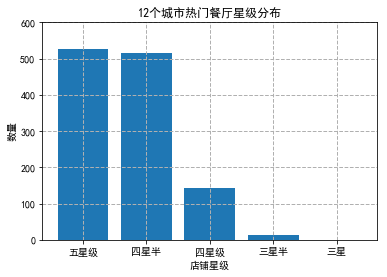

In [85]:
data.describe()
plt.rcParams['font.sans-serif'] = [u'SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
score = data['店铺星级'].value_counts()
print (score)
a = np.array([1,2,3,4,5])
plt.bar(a,score,align = 'center')
plt.xlabel('店铺星级')
plt.ylabel('数量')
plt.title('12个城市热门餐厅星级分布')
plt.grid(linestyle = '--',linewidth = 1)
plt.ylim(0,600)
plt.xticks(a,('五星级','四星半','四星级','三星半','三星'))
plt.show()

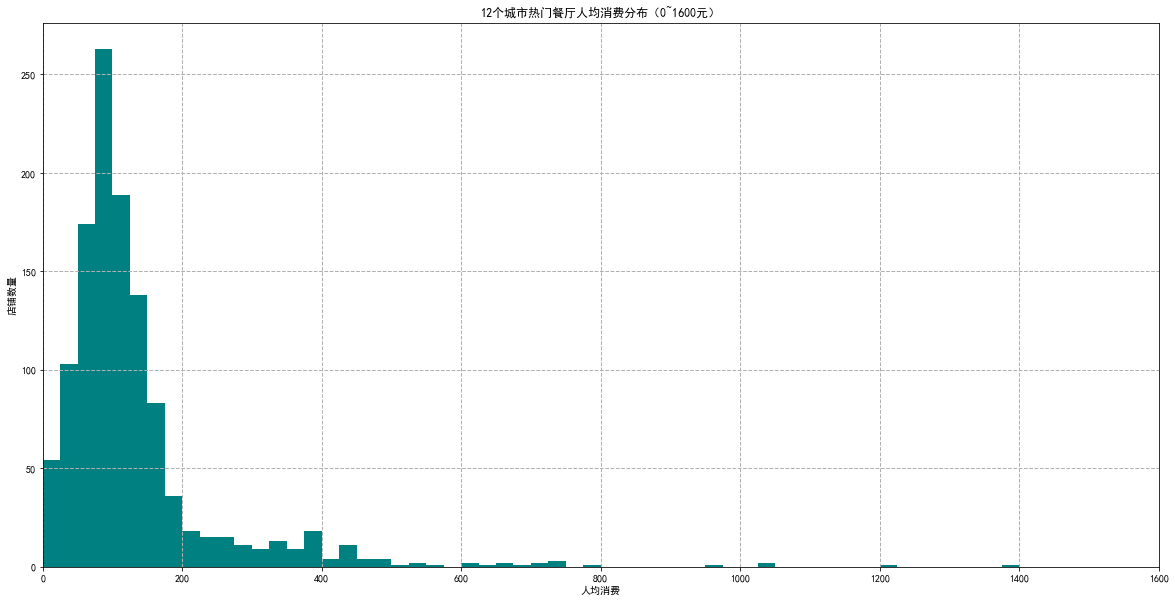

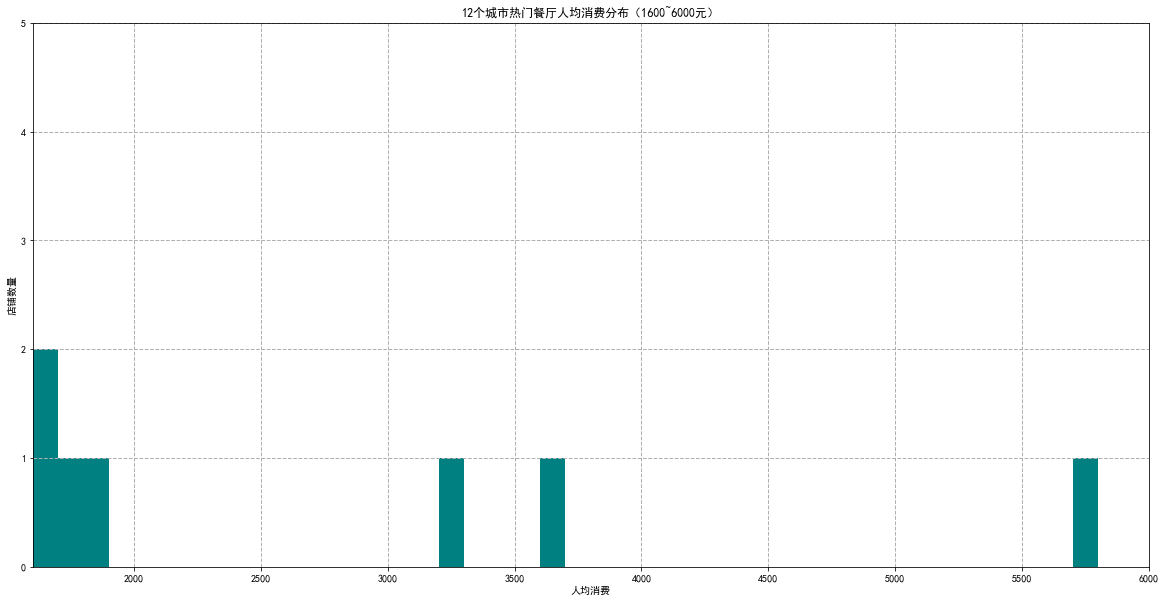

In [183]:
plt.figure(figsize=(20,10))#设置图表大小
bins=np.arange(0,1600,25)#设置连续的边界值，即直方图的分布区间，直方图会进行统计各个区间的数值
plt.hist(data['人均消费'],bins,color='teal',alpha=1)#alpha设置透明度，0为完全透明
plt.xlabel('人均消费')
plt.ylabel('店铺数量')
plt.title('12个城市热门餐厅人均消费分布（0~1600元）')
plt.grid(linestyle = '--',linewidth = 1)
plt.xlim(0,1600)#设置x轴分布范围
plt.show()


plt.figure(figsize=(20,10))
bins=np.arange(1600,6000,100)
plt.hist(data['人均消费'],bins,color='teal',alpha=1)
plt.xlabel('人均消费')
plt.ylabel('店铺数量')
plt.title('12个城市热门餐厅人均消费分布（1600~6000元）')
plt.grid(linestyle = '--',linewidth = 1)
plt.xlim(1600,6000)#设置x轴分布范围
plt.ylim(0,5)#设置x轴分布范围
plt.show()

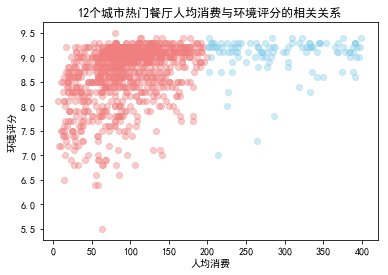

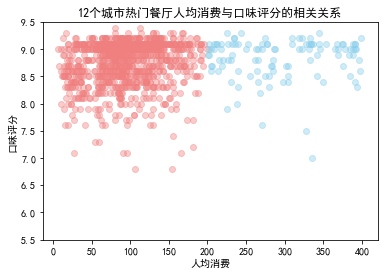

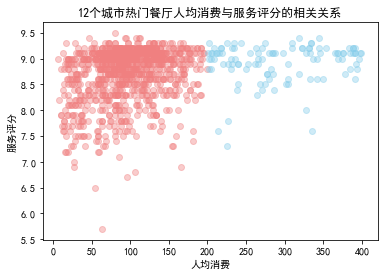

In [335]:
#研究12个城市热门餐厅人均消费与环境评分的相关关系
df = pd.DataFrame(data)
newprice_a=[]#人均小于200
newenpower_a=[]
newprice_b=[]#人均200~400
newenpower_b=[]
newprice_c=[]
newaver_a=[]#人均200以下的平均评分
newaver_b=[]#人均200~400的平均评分
newaver_c=[]#人均大于1000的平均评分
averpower=[]#平均评分
#剔除人均消费较高（大于400）的样本
#并以人均200为界进行区分
for i in range(len(df)):
    document = df[i:i+1]
    price = document['人均消费'][i]
    enpower=document['环境评分'][i]
    #求平均评分
    averange=(document['环境评分'][i]+document['口味评分'][i]+document['服务评分'][i])/3
    averpower.append(averange)
    if(price<200):
        newprice_a.append(price)
        newenpower_a.append(enpower)
        newaver_a.append(averange)
    else:
        if(price<400):
            newprice_b.append(price)
            newenpower_b.append(enpower)
            newaver_b.append(averange)
        else:
            newaver_c.append(averange)
            newprice_c.append(price)

plt.scatter(newprice_a,newenpower_a,color='lightcoral',alpha=0.4)
plt.scatter(newprice_b,newenpower_b,color='skyblue',alpha=0.4)
plt.xlabel('人均消费')
plt.ylabel('环境评分')
plt.title('12个城市热门餐厅人均消费与环境评分的相关关系')
plt.show()

#研究12个城市热门餐厅人均消费与口味评分的相关关系
df = pd.DataFrame(data)
newprice_a=[]
newenpower_a=[]
newprice_b=[]
newenpower_b=[]
#剔除人均消费较高（大于400）的样本
#并以人均200为界进行区分
for i in range(len(df)):
    document = df[i:i+1]
    price = document['人均消费'][i]
    enpower=document['口味评分'][i]
    if(price<200):
        newprice_a.append(price)
        newenpower_a.append(enpower)
    else:
        if(price<400):
            newprice_b.append(price)
            newenpower_b.append(enpower)

plt.scatter(newprice_a,newenpower_a,color='lightcoral',alpha=0.4)
plt.scatter(newprice_b,newenpower_b,color='skyblue',alpha=0.4)
plt.xlabel('人均消费')
plt.ylabel('口味评分')
plt.ylim(5.5, 9.5)
plt.title('12个城市热门餐厅人均消费与口味评分的相关关系')
plt.show()

#研究12个城市热门餐厅人均消费与服务评分的相关关系
df = pd.DataFrame(data)
newprice_a=[]
newenpower_a=[]
newprice_b=[]
newenpower_b=[]
#剔除人均消费较高（大于400）的样本
#并以人均200为界进行区分
for i in range(len(df)):
    document = df[i:i+1]
    price = document['人均消费'][i]
    enpower=document['服务评分'][i]
    if(price<200):
        newprice_a.append(price)
        newenpower_a.append(enpower)
    else:
        if(price<400):
            newprice_b.append(price)
            newenpower_b.append(enpower)

plt.scatter(newprice_a,newenpower_a,color='lightcoral',alpha=0.4)
plt.scatter(newprice_b,newenpower_b,color='skyblue',alpha=0.4)
plt.xlabel('人均消费')
plt.ylabel('服务评分')
plt.title('12个城市热门餐厅人均消费与服务评分的相关关系')
plt.show()

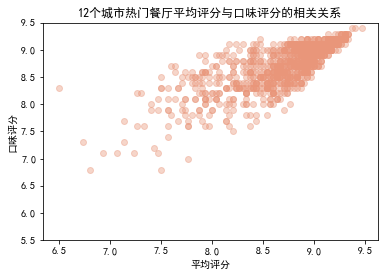

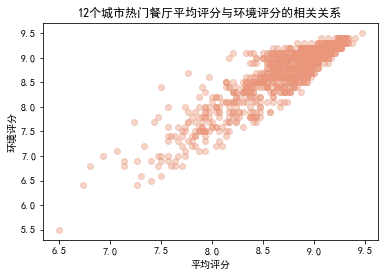

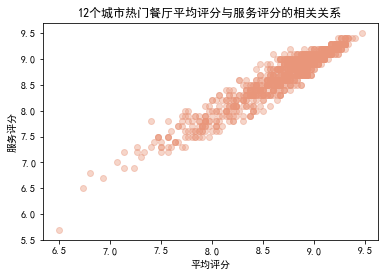

In [336]:
#12个城市热门餐厅平均评分与口味评分的相关关系
x=averpower
y=data['口味评分']
plt.ylim(5.5, 9.5)
plt.scatter(x,y,color='darksalmon',alpha=0.4)
plt.xlabel('平均评分')
plt.ylabel('口味评分')
plt.title('12个城市热门餐厅平均评分与口味评分的相关关系')
plt.show()

#12个城市热门餐厅平均评分与环境评分的相关关系
x=averpower
y=data['环境评分']
plt.scatter(x,y,color='darksalmon',alpha=0.4)
plt.xlabel('平均评分')
plt.ylabel('环境评分')
plt.title('12个城市热门餐厅平均评分与环境评分的相关关系')
plt.show()

#12个城市热门餐厅平均评分与服务评分的相关关系
x=averpower
y=data['服务评分']
plt.scatter(x,y,color='darksalmon',alpha=0.4)
plt.xlabel('平均评分')
plt.ylabel('服务评分')
plt.title('12个城市热门餐厅平均评分与服务评分的相关关系')
plt.show()

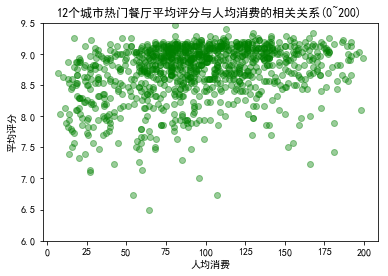

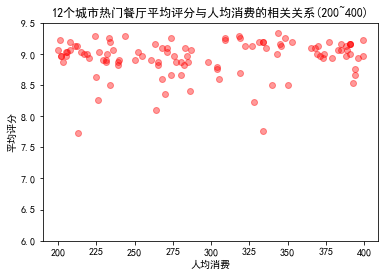

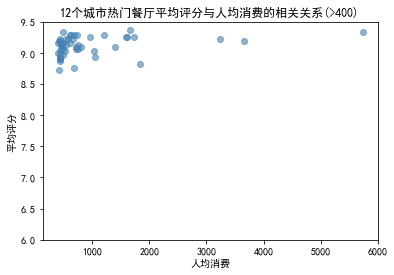

In [207]:
#12个城市热门餐厅平均评分与人均消费的相关关系
#分为3个梯度0~200，200~400，400以上

plt.scatter(newprice_a,newaver_a,color='green',alpha=0.4)
plt.xlabel('人均消费')
plt.ylabel('平均评分')
plt.title('12个城市热门餐厅平均评分与人均消费的相关关系(0~200)')
plt.ylim(6.0, 9.5)
plt.show()

plt.scatter(newprice_b,newaver_b,color='red',alpha=0.4)
plt.xlabel('人均消费')
plt.ylabel('平均评分')
plt.title('12个城市热门餐厅平均评分与人均消费的相关关系(200~400)')
plt.ylim(6.0, 9.5)
plt.show()

plt.scatter(newprice_c,newaver_c,color='steelblue',alpha=0.6)
plt.xlabel('人均消费')
plt.ylabel('平均评分')
plt.title('12个城市热门餐厅平均评分与人均消费的相关关系(>400)')
plt.ylim(6.0, 9.5)
plt.show()

西餐         93
日本料理       61
自助餐        59
川菜家常菜      53
重庆火锅       47
粤菜馆        41
小龙虾        38
浙菜         38
韩国料理       28
海鲜         27
东南亚菜       27
四川火锅       26
烧烤         26
串串香        24
火锅         23
创意菜        23
融合烤肉       22
面包烘焙       22
快餐简餐       21
烤串         21
茶饮果汁       20
面馆         19
湖北菜/家常菜    19
陕西菜        16
私房菜        16
甜品         15
日式烧烤/烤肉    15
广州菜        14
咖啡厅        13
小吃         13
           ..
俄罗斯菜        1
豆花          1
老北京小吃       1
粉面馆         1
东北家常菜       1
热干面         1
钵钵鸡         1
烤翅          1
粤菜          1
粤式茶点        1
牛杂          1
自贡盐帮菜       1
日式简餐/快餐     1
日式铁板烧       1
新疆菜         1
馄饨          1
甘肃菜         1
韩式小吃        1
越南菜         1
卤味鸭脖        1
饺子          1
胡辣汤         1
新加坡菜        1
兔头/兔丁       1
蹄花          1
福建菜         1
本帮江浙菜       1
大闸蟹         1
生煎/锅贴       1
炖菜          1
Name: 分类名称, Length: 117, dtype: int64


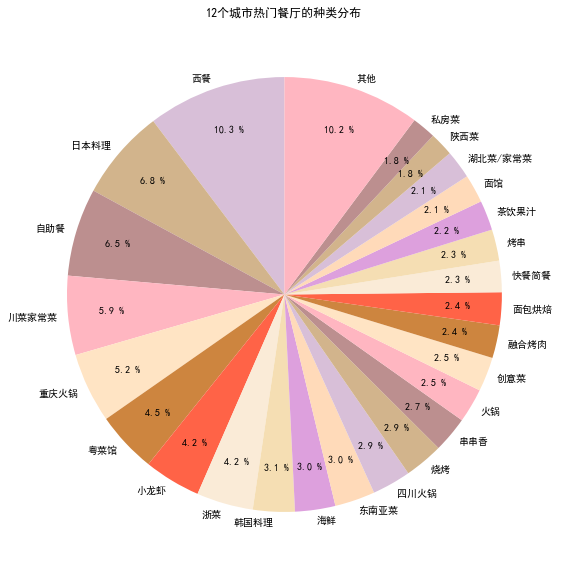

In [278]:
#分析热门餐厅的种类分布
import numpy as np
import os
plt.figure(figsize=(10,10))#设置图表大小
#score = data['分类名称'].value_counts(normalize=True)#输出每种所占百分比
score = data['分类名称'].value_counts()
print (score)
newscore=[]
newlabels=[]
othertype=0
i=0
#数据预处理，15家以下的种类不单独统计
for row in score:
    if row>15:
        newscore.append(row)
        newlabels.append(score.index[i])#获取标签
        #保存门店数目多的种类到type.txt，用于词云绘制
        f=open("type.txt", "a+")
        f.write(score.index[i])
        f.write('\n')
        f.close
    else:
        othertype=othertype+1
    i=i+1
newscore.append(othertype)
newlabels.append("其他")
#print(newlabels)

colors=['thistle','tan','rosybrown','lightpink','bisque','peru','tomato','antiquewhite','wheat','plum','peachpuff']
plt.title('12个城市热门餐厅的种类分布')
plt.pie(newscore,labels=newlabels,labeldistance=1.05, colors=colors,startangle = 90,pctdistance = 0.8,autopct='%3.1f %%')
plt.show()

三里屯           13
王府井/东单         7
望京             5
国贸             4
五棵松            4
中关村            4
前门             4
亮马桥/三元桥        4
双井             3
青年路            3
五道口            3
朝外大街           2
朝阳公园/团结湖       2
大望路            2
什刹海            2
西单             2
酒仙桥            2
西直门/动物园        2
地安门            2
北新桥/簋街         2
朝阳区            2
西四             1
次渠             1
首都机场           1
对外经贸           1
复兴门            1
百子湾            1
阜成门            1
新街口            1
工人体育场          1
北京西站/六里桥       1
雍和宫/地坛         1
十里堡            1
安贞             1
高碑店            1
远大路            1
牛街             1
六里桥/丽泽桥        1
紫竹桥            1
南锣鼓巷/鼓楼东大街     1
蓝色港湾           1
魏公村            1
亚运村            1
东直门            1
崇文门            1
丰台区            1
Name: 所在区域, dtype: int64


<Figure size 720x720 with 0 Axes>

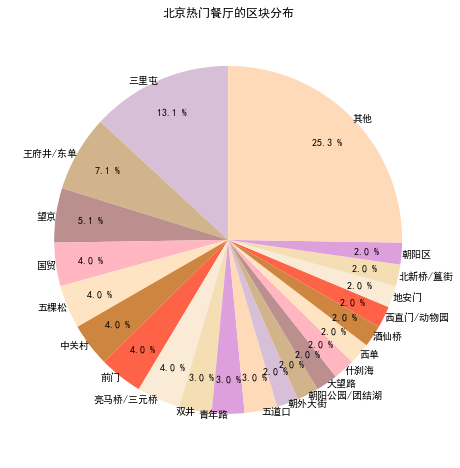

In [340]:
#分析北京热门餐厅的区块分布

plt.figure(figsize=(10,10))#设置图表大小
bjdata=data[101:200]#北京100家店铺在爬取数据中的范围 类似可分析其他地区
score = bjdata['所在区域'].value_counts()
print (score)
bjnewscore=[]
bjnewlabels=[]
bjothertype=0
i=0
#数据预处理，只有1家的区块合并，不单独统计
for row in score:
    if row>1:
        bjnewscore.append(row)
        bjnewlabels.append(score.index[i])#获取标签
    else:
        bjothertype=bjothertype+1
    i=i+1
bjnewscore.append(bjothertype)
bjnewlabels.append("其他")
#print(newlabels)
plt.figure(figsize=(8,8))
colors=['thistle','tan','rosybrown','lightpink','bisque','peru','tomato','antiquewhite','wheat','plum','peachpuff']
plt.title('北京热门餐厅的区块分布')
#只有1家的区块不合并 绘制语句如下
#plt.pie(score,labels=score.index,labeldistance=1.1, colors=colors,startangle = 90,pctdistance = 0.8,autopct='%3.1f %%')
plt.pie(bjnewscore,labels=bjnewlabels,labeldistance=1, colors=colors,startangle = 90,pctdistance = 0.8,autopct='%3.1f %%')
plt.show()

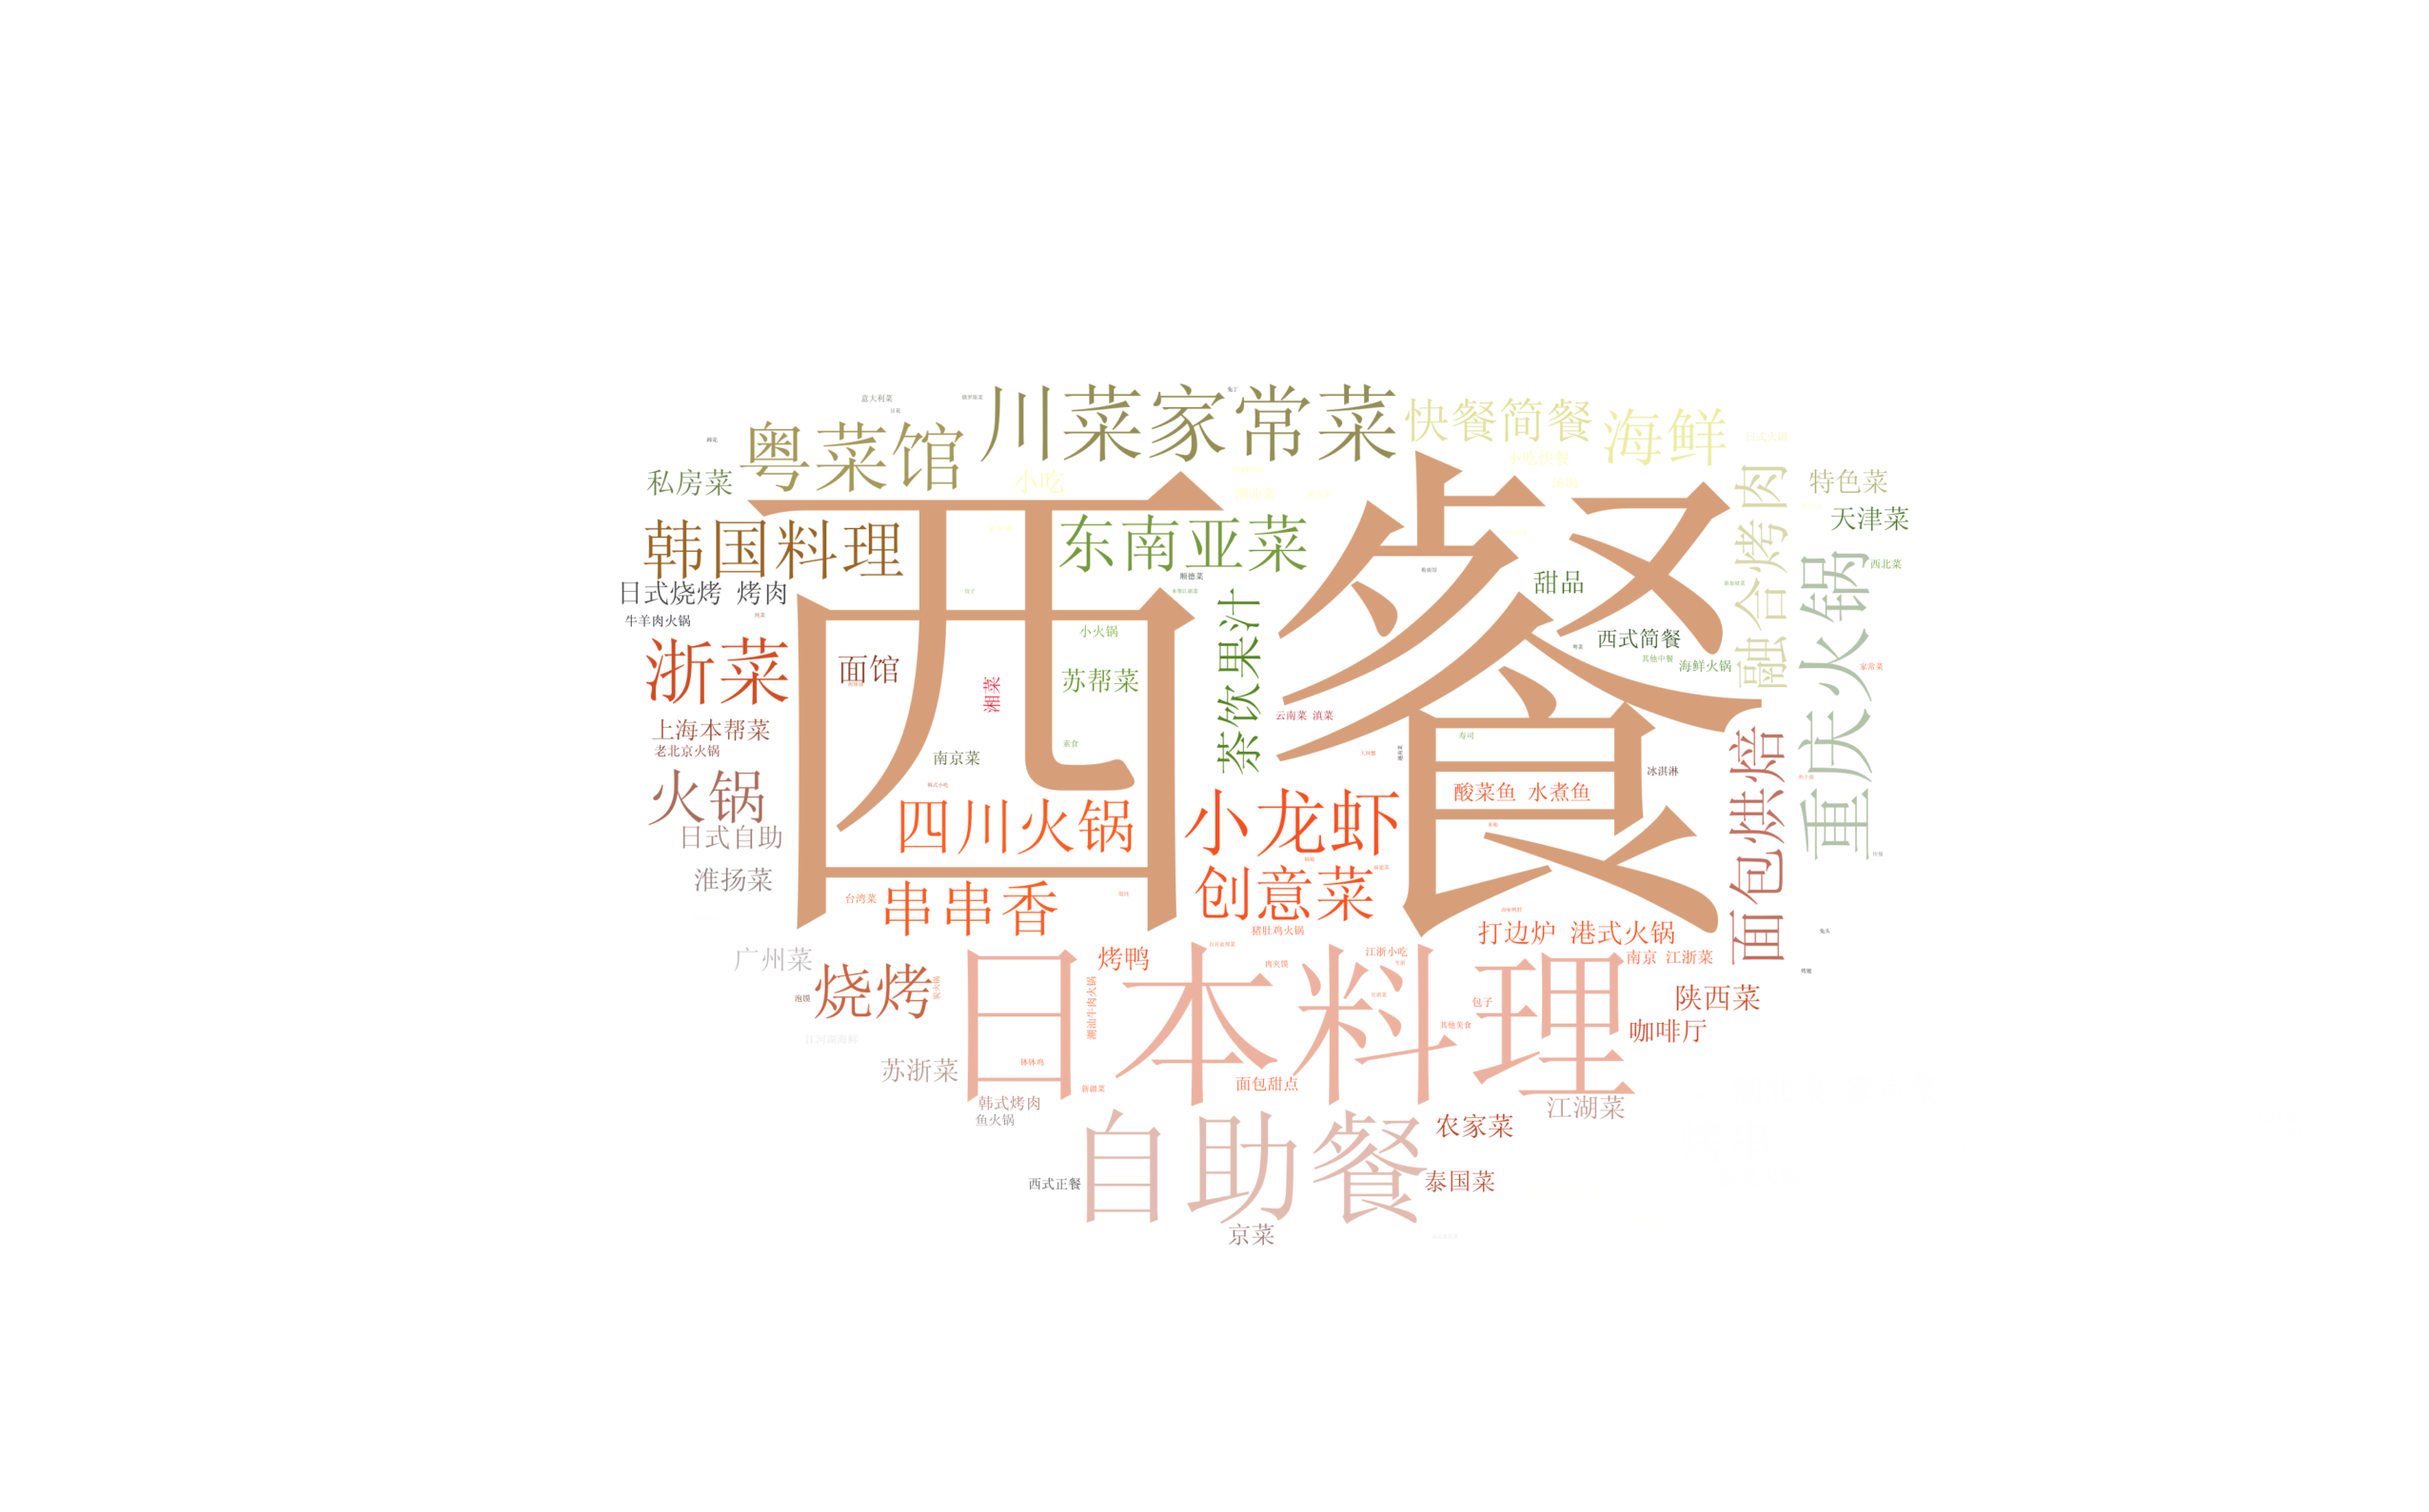

In [333]:
#绘制词云(按一个碗的形状排布)

# - * - coding: utf - 8 -*-
from os import path
from PIL import Image
from scipy.misc import imread
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud, ImageColorGenerator

text = open(path.join( 'Alltype.txt')).read()#读取文本
#cut_text = " ".join(jieba.cut(text))#利用jieba进行中文分词，由于文本保存时已经有分割，此处可省略

#生成一个词云图像
#mask = "图片",  #设置背景图片（按照背景图片的形状排布词云）
#max_font_size设定生成词云中的文字最大大小
#width,height,margin可以设置图片属性xl
alice_mask = np.array(Image.open(path.join(r"C:\Users\小非菲\Documents\zmf\python\201906期末 大众点评\20151119050114793.jpg")))
wordcloud = WordCloud(scale=4,max_font_size=200,min_font_size=0,mask = alice_mask,font_path = "D:\Anaconda3\Scripts\simsun.ttc",background_color = "white",width=2000,height=2000).generate(text)
image_colors = ImageColorGenerator(alice_mask)#词云颜色参考mask的颜色
wordcloud.recolor(color_func = image_colors)
plt.figure(figsize=(45,40))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") #不显示坐标尺寸
plt.show()
